## Mobile Price Prediction 

In [2]:
# Import libraries
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import pickle
import joblib



In [3]:
# Import Dataset
df=pd.read_csv("data.csv",header =0)
df.head()

,Unnamed: 0,Brand me,Ratings,RAM,ROM,Mobile_Size,Primary_Cam,Selfi_Cam,Battery_Power,Price
0,0,"LG V30+ (Black, 128 )",4.3,4.0,128.0,6.00,48,13.0,4000,24999
1,1,I Kall K11,3.4,6.0,64.0,4.50,48,12.0,4000,15999
2,2,Nokia 105 ss,4.3,4.0,4.0,4.50,64,16.0,4000,15000
3,3,"Samsung Galaxy A50 (White, 64 )",4.4,6.0,64.0,6.40,48,15.0,3800,18999
4,4,"POCO F1 (Steel Blue, 128 )",4.5,6.0,128.0,6.18,35,15.0,3800,18999


### Data Preprocessing

In [4]:
# Drop the Unwannted column the first one
df.drop(['Unnamed: 0'],axis=1,inplace=True)

In [5]:
# After removing the dataset look like
df.head()

,Brand me,Ratings,RAM,ROM,Mobile_Size,Primary_Cam,Selfi_Cam,Battery_Power,Price
0,"LG V30+ (Black, 128 )",4.3,4.0,128.0,6.00,48,13.0,4000,24999
1,I Kall K11,3.4,6.0,64.0,4.50,48,12.0,4000,15999
2,Nokia 105 ss,4.3,4.0,4.0,4.50,64,16.0,4000,15000
3,"Samsung Galaxy A50 (White, 64 )",4.4,6.0,64.0,6.40,48,15.0,3800,18999
4,"POCO F1 (Steel Blue, 128 )",4.5,6.0,128.0,6.18,35,15.0,3800,18999


In [6]:
# Checking null values into the dataset
df.isnull().sum()

Brand me           0
Ratings           31
RAM                7
ROM                4
Mobile_Size        2
Primary_Cam        0
Selfi_Cam        269
Battery_Power      0
Price              0
dtype: int64

<AxesSubplot:>

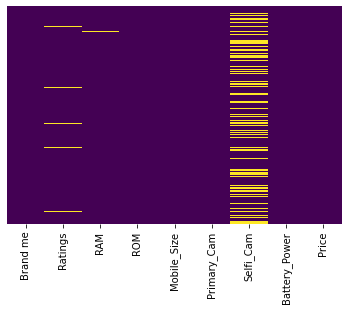

In [7]:
# Seeing the null values using heatmap
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [8]:
# Summary of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 836 entries, 0 to 835
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Brand me       836 non-null    object 
 1   Ratings        805 non-null    float64
 2   RAM            829 non-null    float64
 3   ROM            832 non-null    float64
 4   Mobile_Size    834 non-null    float64
 5   Primary_Cam    836 non-null    int64  
 6   Selfi_Cam      567 non-null    float64
 7   Battery_Power  836 non-null    int64  
 8   Price          836 non-null    int64  
dtypes: float64(5), int64(3), object(1)
memory usage: 58.9+ KB


In [9]:
df.dtypes

Brand me          object
Ratings          float64
RAM              float64
ROM              float64
Mobile_Size      float64
Primary_Cam        int64
Selfi_Cam        float64
Battery_Power      int64
Price              int64
dtype: object

In [10]:
# Describe
df.describe()

,Ratings,RAM,ROM,Mobile_Size,Primary_Cam,Selfi_Cam,Battery_Power,Price
count,805.000000,829.000000,832.000000,834.000000,836.000000,567.000000,836.000000,836.00000
mean,4.103106,6.066345,64.373077,5.597282,47.983254,9.784832,3274.688995,18220.34689
std,0.365356,2.530336,53.447825,3.898664,11.170093,6.503838,927.518852,52805.55022
min,2.800000,0.000000,0.000000,2.000000,5.000000,0.000000,1020.000000,479.00000
25%,3.800000,6.000000,32.000000,4.500000,48.000000,5.000000,3000.000000,984.75000
50%,4.100000,6.000000,40.000000,4.770000,48.000000,8.000000,3000.000000,1697.00000
75%,4.400000,6.000000,64.000000,6.300000,48.000000,13.000000,3800.000000,18999.00000
max,4.800000,34.000000,256.000000,44.000000,64.000000,61.000000,6000.000000,573000.00000


In [11]:
# Dropping the Name columns
df.drop(['Brand me'],axis=1,inplace=True)

### Handling Missing Values

In [12]:
# We should handling these null or missing values
df.isnull().sum()

Ratings           31
RAM                7
ROM                4
Mobile_Size        2
Primary_Cam        0
Selfi_Cam        269
Battery_Power      0
Price              0
dtype: int64

In [13]:
# Fill up the mean values of all the missing value columns into the dataset
df['Ratings'] = df['Ratings'].fillna(df['Ratings'].mean())
df['RAM'] = df['RAM'].fillna(df['RAM'].mean())
df['ROM'] = df['ROM'].fillna(df['ROM'].mean())
df['Mobile_Size'] = df['Mobile_Size'].fillna(df['Mobile_Size'].mean())
df['Selfi_Cam'] = df['Selfi_Cam'].fillna(df['Selfi_Cam'].mean())

In [14]:
# After handling the all of the missing and null values from the dataset
df.isnull().sum()

Ratings          0
RAM              0
ROM              0
Mobile_Size      0
Primary_Cam      0
Selfi_Cam        0
Battery_Power    0
Price            0
dtype: int64

<AxesSubplot:>

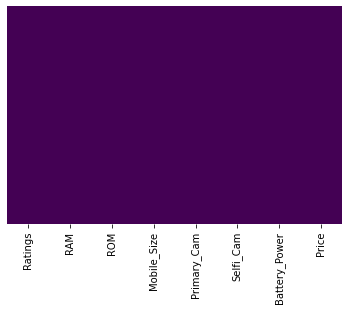

In [15]:
# We can able to see the there is no null values  
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [16]:
# Changing the Datatype
df['RAM'] = df['RAM'].astype('int64')
df['ROM'] = df['ROM'].astype('int64')
df['Selfi_Cam'] = df['Selfi_Cam'].astype('int64')

In [17]:
# Final dataset for build a model
df.head()

,Ratings,RAM,ROM,Mobile_Size,Primary_Cam,Selfi_Cam,Battery_Power,Price
0,4.3,4,128,6.00,48,13,4000,24999
1,3.4,6,64,4.50,48,12,4000,15999
2,4.3,4,4,4.50,64,16,4000,15000
3,4.4,6,64,6.40,48,15,3800,18999
4,4.5,6,128,6.18,35,15,3800,18999


### Exploratory Data Analysis 

In [18]:
# Columns

#### Let's Understand about the Features

- **1. Brand me** This is first feature of our dataset. It's Denotes name of the mobile phones and   Brands.</br>
- **2.Ratings** This Feature Denotes Number of the ratings gave by the consumers for each mobile.</br>
- **3.RAM** It's have RAM size of the phone. </br>
- **4.ROM** It's have ROM **(Internal Memory)** size of the phone. </br>
- **5.Mobile_Size** It's represents how many inches of the particular mobile phone have. Here all the values are gave in **inches** </br>
- **6.Primary_Cam** It's Denotes Number of the pixels of the primary camera **(Back Camera)** for each mobiles.</br>
- **7.Selfi_Cam** It's Denotes Number of the pixels of the Selfi camera **(Front Camera)** for each mobiles.</br>
- **8.Battery_Power** It's Denotes amount of the battery power in each mobiles in **mAh**.</br>
- **9.Price** It's a Dependent Feature of the dataset. It's just denote prices of the each mobiles.


In [19]:
# Finding out the correlation between the features
corr = df.corr()
corr.shape

(8, 8)

<AxesSubplot:>

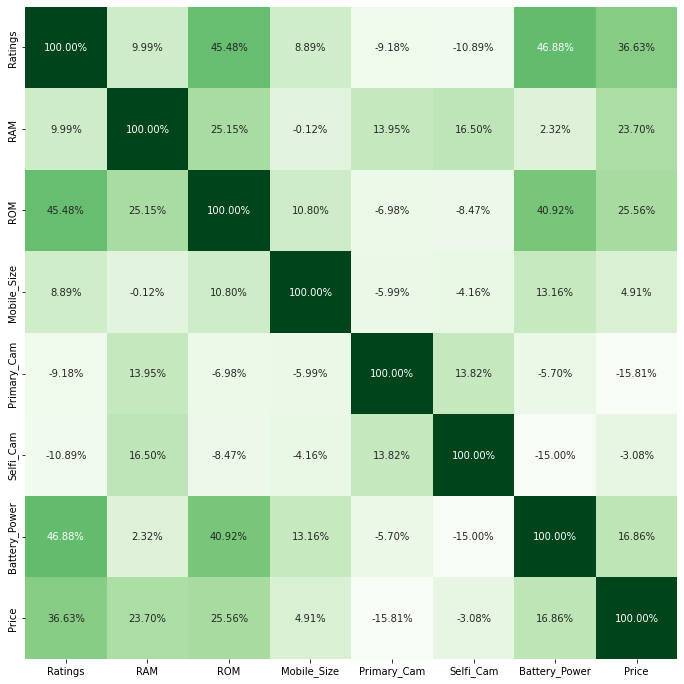

In [20]:
# Plotting the heatmap of correlation between features
plt.figure(figsize=(12,12))
sns.heatmap(corr, cbar=False, square= True, fmt='.2%', annot=True, cmap='Greens')

<AxesSubplot:xlabel='Ratings', ylabel='count'>

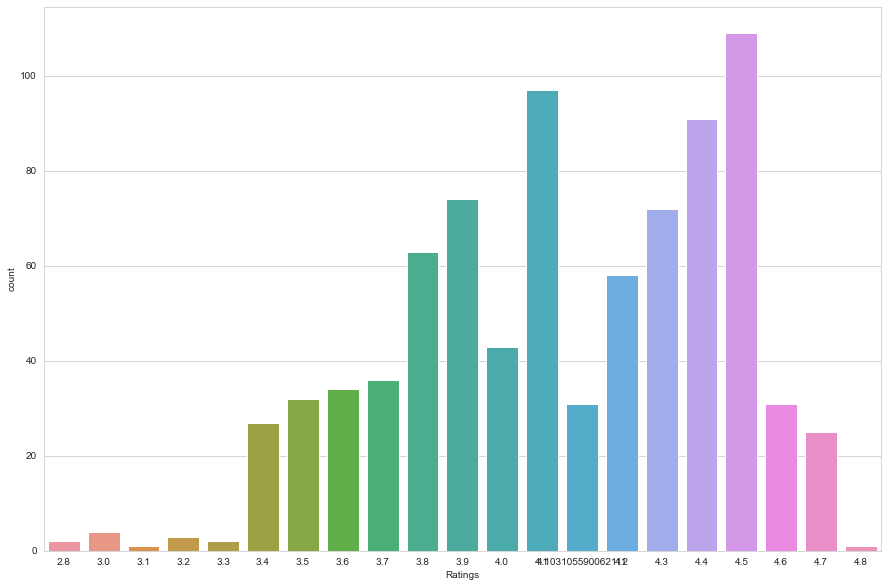

In [21]:
plt.figure(figsize=(15,10))
sns.set_style('whitegrid')
sns.countplot(x='Ratings',data=df)

<AxesSubplot:xlabel='RAM', ylabel='count'>

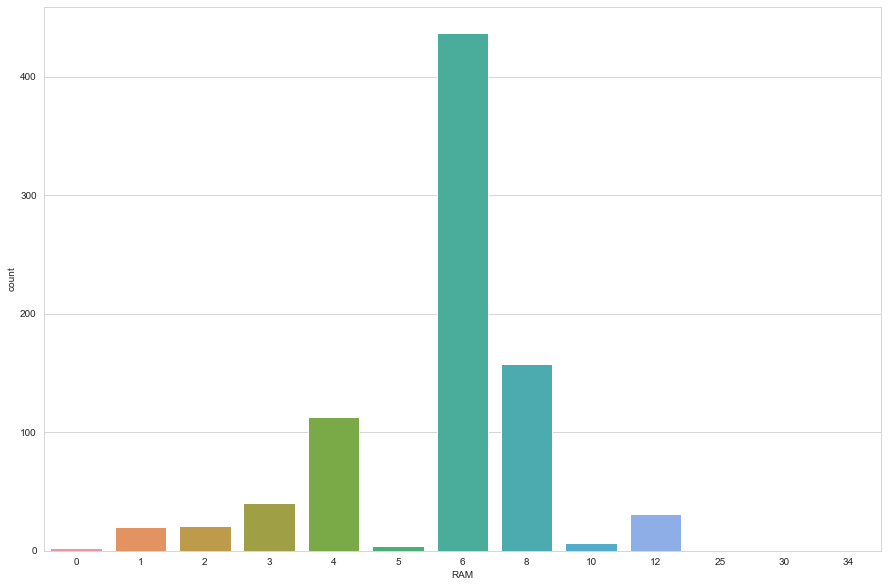

In [22]:
plt.figure(figsize=(15,10))
sns.set_style('whitegrid')
sns.countplot(x='RAM',data=df)

<AxesSubplot:xlabel='ROM', ylabel='count'>

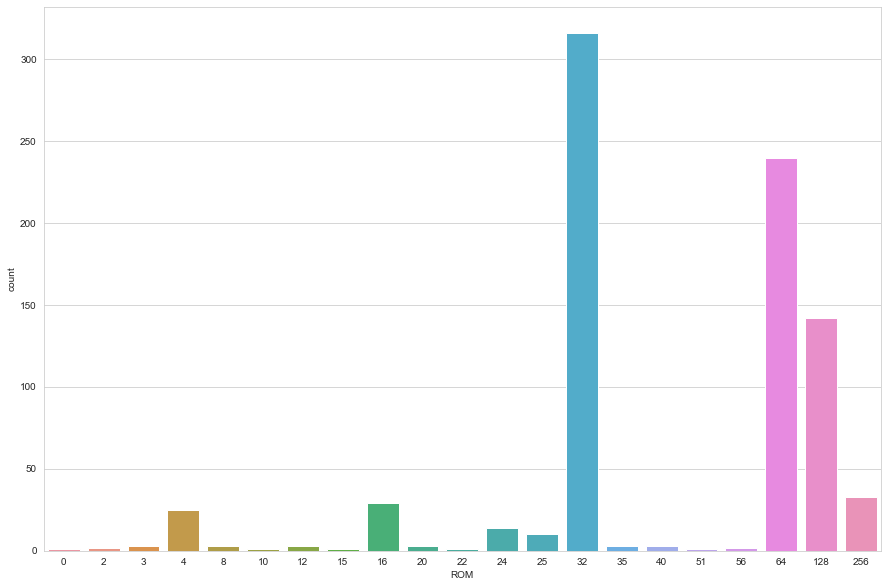

In [23]:
plt.figure(figsize=(15,10))
sns.set_style('whitegrid')
sns.countplot(x='ROM',data=df)

<AxesSubplot:xlabel='Primary_Cam', ylabel='count'>

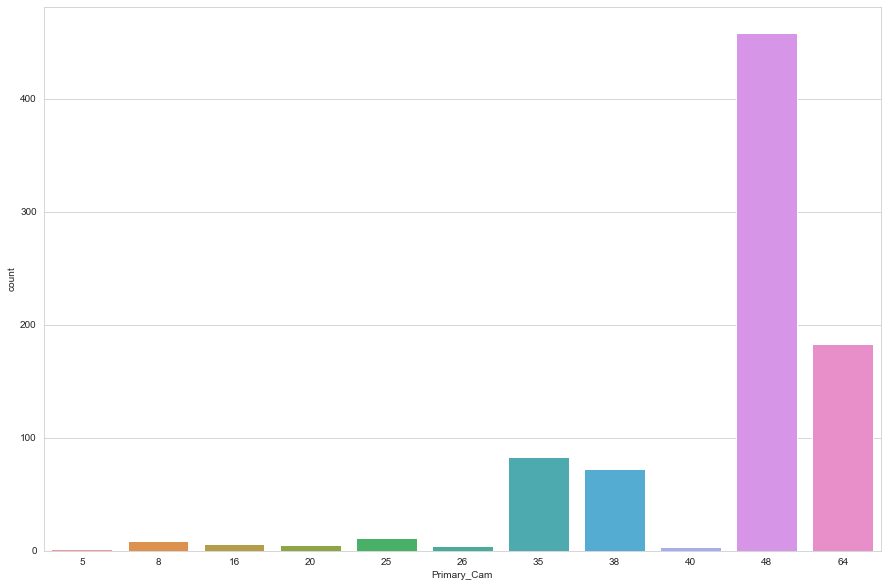

In [24]:
plt.figure(figsize=(15,10))
sns.set_style('whitegrid')
sns.countplot(x='Primary_Cam',data=df)

<AxesSubplot:xlabel='Selfi_Cam', ylabel='count'>

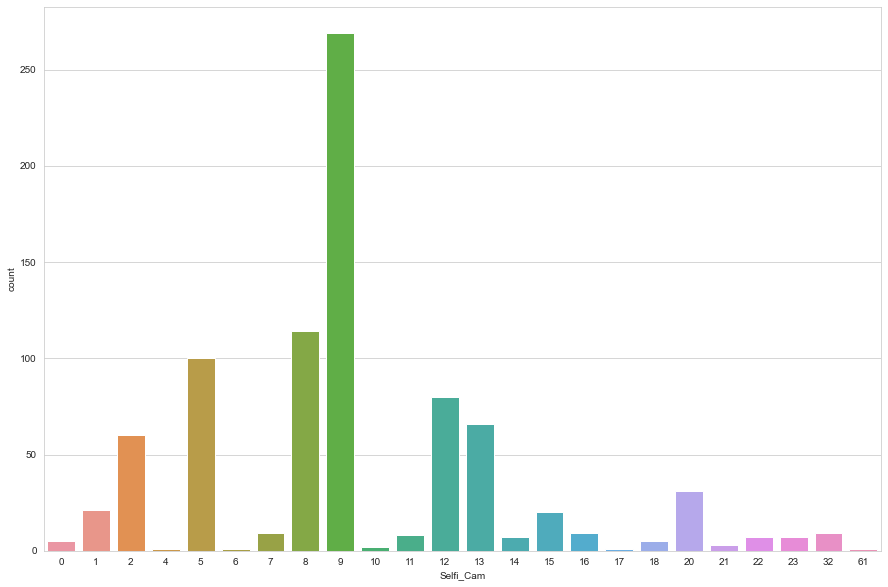

In [25]:
plt.figure(figsize=(15,10))
sns.set_style('whitegrid')
sns.countplot(x='Selfi_Cam',data=df)

/var/folders/n5/0h7jg2g561q5lpz2jngt_m_40000gn/T/ipykernel_47320/276234300.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['RAM'].dropna(),kde=False,color='darkred',bins=10)


<AxesSubplot:xlabel='RAM'>

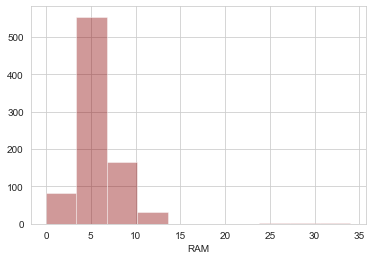

In [26]:
sns.distplot(df['RAM'].dropna(),kde=False,color='darkred',bins=10)

/var/folders/n5/0h7jg2g561q5lpz2jngt_m_40000gn/T/ipykernel_47320/2423304100.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Battery_Power'].dropna(),kde=False,color='green',bins=10)


<AxesSubplot:xlabel='Battery_Power'>

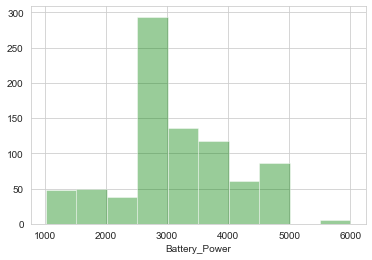

In [27]:
sns.distplot(df['Battery_Power'].dropna(),kde=False,color='green',bins=10)

/var/folders/n5/0h7jg2g561q5lpz2jngt_m_40000gn/T/ipykernel_47320/1405171433.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Price'].dropna(),kde=False,color='darkblue',bins=15)


<AxesSubplot:xlabel='Price'>

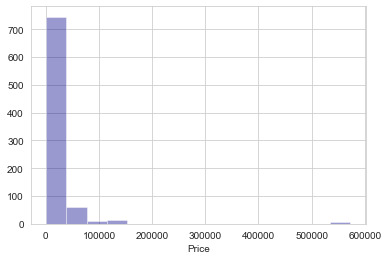

In [28]:
sns.distplot(df['Price'].dropna(),kde=False,color='darkblue',bins=15)

/var/folders/n5/0h7jg2g561q5lpz2jngt_m_40000gn/T/ipykernel_47320/3596712579.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Battery_Power'].dropna(),kde=False,color='darkblue',bins=15)


<AxesSubplot:xlabel='Battery_Power'>

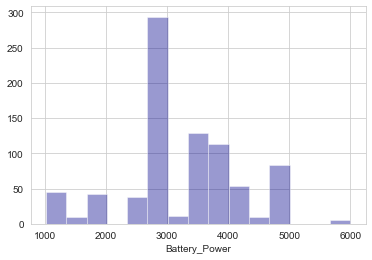

In [29]:
sns.distplot(df['Battery_Power'].dropna(),kde=False,color='darkblue',bins=15)

<Figure size 720x720 with 0 Axes>

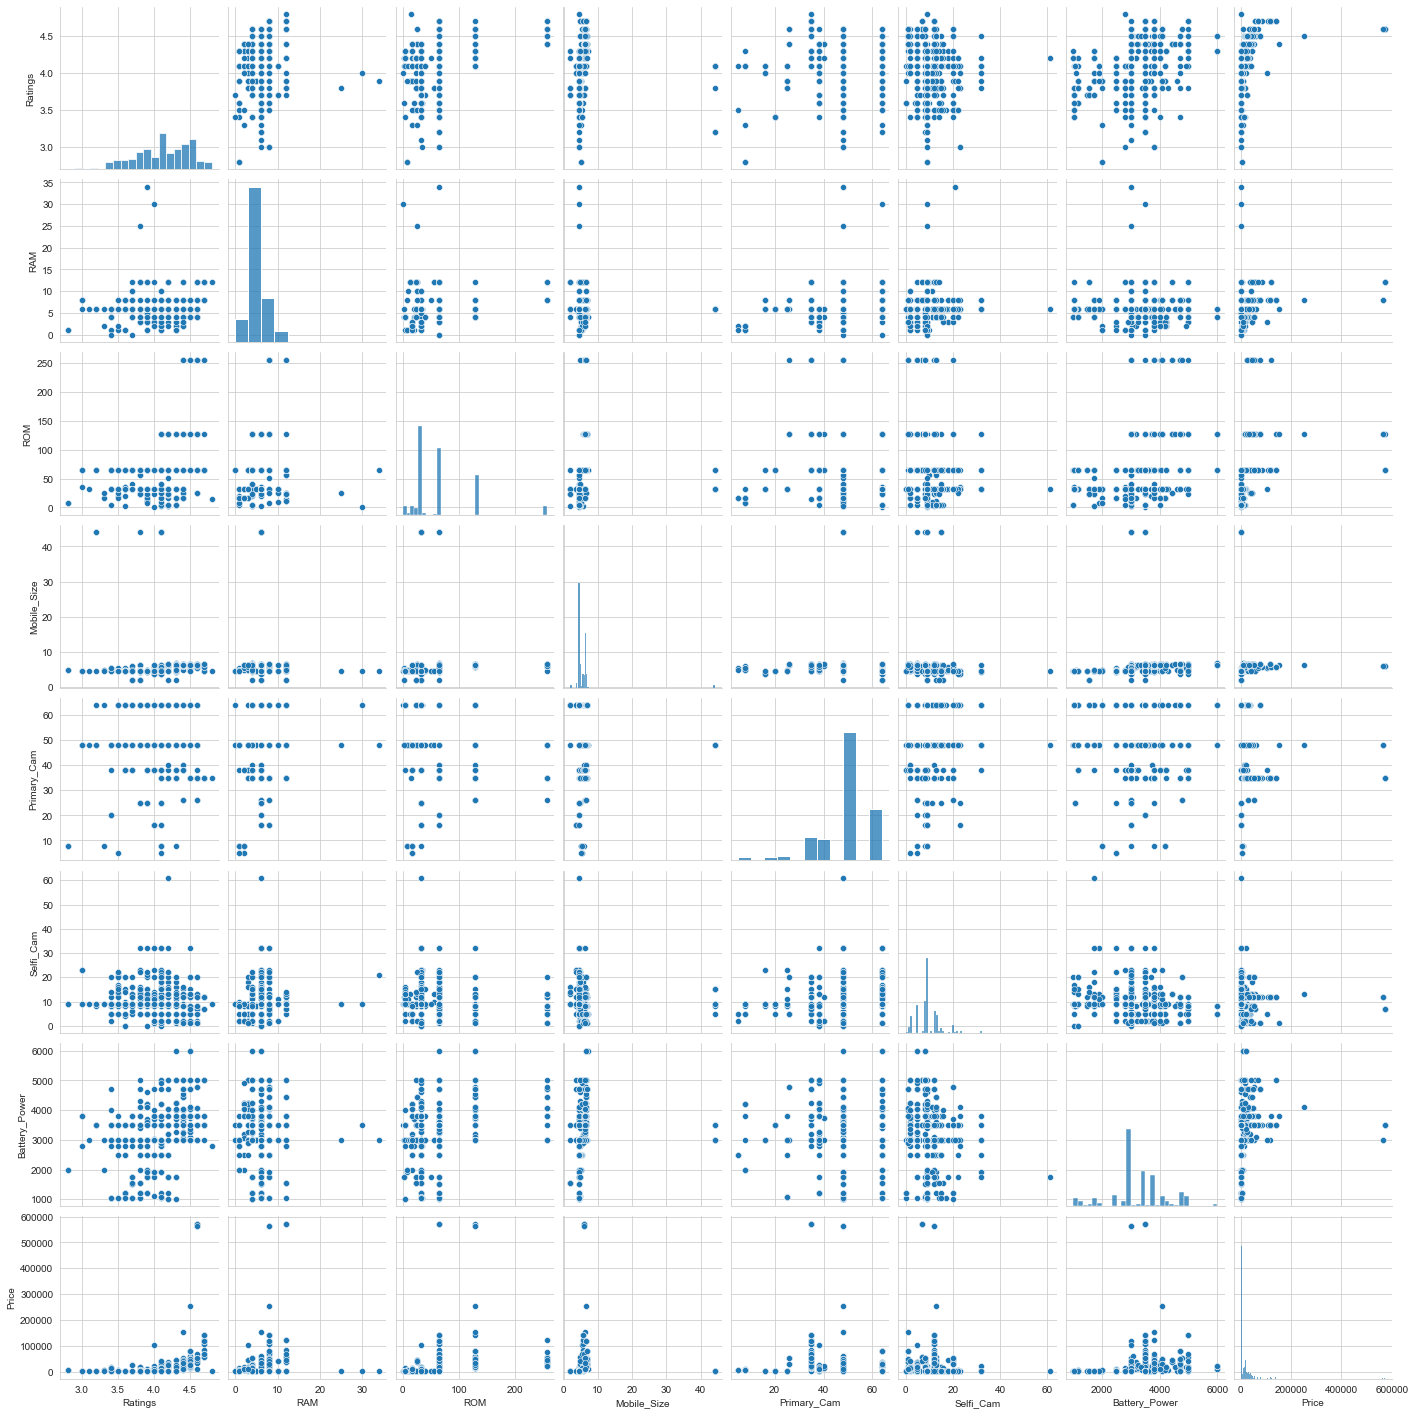

In [30]:
plt.figure(figsize=(10,10))
sns.pairplot(data=df)

## Feature Selection

In [31]:
# Lets try to understand which are important feature for this dataset
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [32]:
X = df.iloc[:,1:7]  # Independent columns
y = df.iloc[:,[-1]] # Yarget column i.e price range 

In [33]:
# Apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=4)
fit = bestfeatures.fit(X,y)

In [34]:
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

In [35]:
# Concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns

In [36]:
featureScores

,Specs,Score
0,RAM,605.009453
1,ROM,31222.209834
2,Mobile_Size,874.471349
3,Primary_Cam,1465.379223
4,Selfi_Cam,1358.898574
5,Battery_Power,156629.116310


In [37]:
print(featureScores.nlargest(4,'Score'))  #print 5 best features

           Specs          Score
5  Battery_Power  156629.116310
1            ROM   31222.209834
3    Primary_Cam    1465.379223
4      Selfi_Cam    1358.898574


### Feature Importance

In [38]:
# Fiting Feature Seclection using Ensemble Methods
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)

/var/folders/n5/0h7jg2g561q5lpz2jngt_m_40000gn/T/ipykernel_47320/45490098.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X,y)


ExtraTreesClassifier()

In [39]:
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers

[0.11763022 0.10492087 0.26452374 0.08885209 0.2208499  0.20322318]


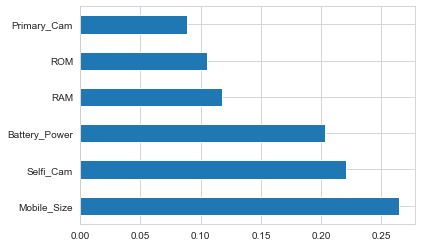

In [40]:
# Plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [41]:
df.head()

,Ratings,RAM,ROM,Mobile_Size,Primary_Cam,Selfi_Cam,Battery_Power,Price
0,4.3,4,128,6.00,48,13,4000,24999
1,3.4,6,64,4.50,48,12,4000,15999
2,4.3,4,4,4.50,64,16,4000,15000
3,4.4,6,64,6.40,48,15,3800,18999
4,4.5,6,128,6.18,35,15,3800,18999


## Model Fitting 

### Random Forest Regressor 

In [42]:
# Value Assigning
X = df.iloc[:,[6,2,4,5,1,3]]
y = df.iloc[:,[-1]]

In [43]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=15)

In [44]:
from sklearn.ensemble import RandomForestRegressor
reg = RandomForestRegressor()
reg.fit(X_train,y_train)

/var/folders/n5/0h7jg2g561q5lpz2jngt_m_40000gn/T/ipykernel_47320/4032883785.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  reg.fit(X_train,y_train)


RandomForestRegressor()

In [45]:
filename = 'finalized_model.sav'
joblib.dump(reg, filename)

['finalized_model.sav']

In [46]:
joblib.dump(reg, 'refr.joblib') 

['refr.joblib']

In [47]:
y_pred = reg.predict(X_train)

In [48]:
print(y_pred)

[  1493.285         823.01711905    957.4468254   31861.51
  13953.01763462  53589.6         18969.           3853.32
  27321.37         1684.0515564    1250.96442857  34196.525
   1118.71190476 136050.38035714  22778.61          749.19110417
  24999.            859.83         1327.62825758    749.19110417
    999.69880014    803.1          3452.66816667  16170.
  72370.34        11122.59         1454.9975       1521.655
    749.19110417   4897.68642857    860.62066342   3310.735
  42569.09        43317.9255      22118.6         49895.095
  11296.19        47136.0544733    8912.21         1223.175
  85040.3707381   14388.82        15481.53         1426.63780556
    871.41757937   8115.            860.62066342  43317.9255
  22642.02222222  18969.          47136.0544733    1111.32333333
   1927.07410714    920.4897619   76659.           1684.0515564
  10092.36666667  17012.01          968.8005      85040.3707381
 496944.89          991.94920635   1177.39333333   9451.77
  37055.28357143 

In [49]:
# Training Score
print("Training Accuracy:",reg.score(X_train,y_train)*100)

Training Accuracy: 95.5929781642588


In [50]:
# Testing Score
print("Testing Accuracy:",reg.score(X_test,y_test)*100)

Testing Accuracy: 92.84073132174238


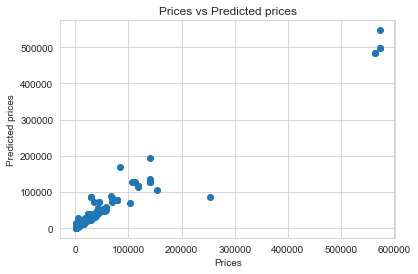

In [51]:
# Visualizing the differences between actual prices and predicted values
plt.scatter(y_train, y_pred)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
plt.show()

In [52]:
# Sample Prediction
reg.predict([[4.0,128.0,6.00,48,13.0,4000]])

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([190189.46414286])

### Support Vector Regressor

In [53]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=15)

In [54]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X_train, y_train)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

In [55]:
y_pred = regressor.predict(X_train)

In [56]:
print(y_pred)

[1692.82013051 1732.90660802 1687.18594727 1769.74098216 1811.90435261
 1755.8133911  1769.55690345 1751.07182792 1769.74098252 1732.94981048
 1755.80068423 1811.76723879 1732.97204599 1811.76660012 1767.48606377
 1732.94349343 1769.7408041  1712.91333273 1724.45744909 1732.94349343
 1733.0408275  1755.7045243  1732.96077222 1811.90430681 1795.56098268
 1724.41966931 1692.82154979 1695.69882214 1732.94349343 1733.05593787
 1733.04011445 1790.43480802 1769.74167149 1770.07075963 1769.55557022
 1755.81333361 1769.45993966 1804.25565253 1779.48804203 1755.70271178
 1782.74637916 1769.56204893 1732.95012611 1732.94872339 1733.04031256
 1712.90271144 1733.04011445 1770.07075963 1779.81141884 1769.55690345
 1804.25565253 1804.00228658 1687.19006621 1732.95052237 1804.24996973
 1732.94981048 1787.73492428 1804.24934415 1732.94886484 1782.74637916
 1755.81338801 1733.04085359 1733.03905299 1779.53888493 1795.84367934
 1760.4316996  1769.55349326 1755.7045243  1732.93193673 1733.04085359
 1732.

In [57]:
# Training Score
print("Training Accuracy:",regressor.score(X_train,y_train)*100)

Training Accuracy: -9.300299696576309


In [58]:
# Testing Score
print("Testing Accuracy:",regressor.score(X_test,y_test)*100)

Testing Accuracy: -11.699889264914143


In [59]:
# Sample Prediction
reg.predict([[4.0,128.0,6.00,48,13.0,4000]])


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([190189.46414286])


#### Random Forest Regressor

- **Tarining Accuracy:** 96.2% Accuracy <br/>
- **Testing Accuracy:** 95.3% Accuracy

####  Support Vector Regressor

- **Tarining Accuracy:** 96.2% Accuracy <br/>
- **Testing Accuracy:** 95.8% Accuracy


In [61]:
reg.predict([[8.0,128.0,6.00,64,18.0,4500]])

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([190189.46414286])

In [62]:
reg.predict([[4.0,64.0,6.00,48,13.0,4000]])

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([190581.92])

In [64]:
reg.predict([[8.0,64.0,6.00,64,18.0,4000]])

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([190581.92])

In [63]:
reg.predict([[8.0,128.0,6.00,48,13.0,4000]])

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([190189.46414286])